<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/introduction-to-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-2-1.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Data Preprocessing

## Definitions

Raw data rarely comes in the form and shape that is necessary for the optimal
performance of a learning algorithm. On the other hand, the success of a machine learning algorithm highly depends on the quality of the data fed into the model. Real-world data is often dirty containing outliers, missing values, wrong data types, irrelevant features, or non-standardized data. The presence of any of these will prevent the machine learning model to properly learn. For this reason, transforming raw data into a useful format is an essential stage in the machine learning process. Therefore,
it is absolutely critical to ensure that we examine and preprocess a dataset before
we feed it to a learning algorithm. In this section, we will discuss the essential data
preprocessing techniques that will help us to build good machine learning models.

The topics that we will cover in this lesson are as follows:

- Removing and imputing missing values from the dataset
- Getting categorical data into shape for machine learning algorithms
- Selecting relevant features for the model construction
- Feature Normalization

## Philosophy of Use of Scikit-Learn

Scikit-learn is one of the most widely used Python libraries for machine learning. Its design philosophy is centered on **simplicity, modularity, and consistency**, making it accessible to both beginners and advanced users.

The **core principles** that guide the usage of scikit-learn are:
1. **Unified API**: Every model (regression, classification, clustering, dimensionality reduction, etc.) follows the same pattern.
2. **Minimal Configuration**: Most models work well with default parameters and can be fine-tuned later.
3. **Consistency**: Whether you are dealing with a linear regression, decision tree, or neural network, the interaction with models remains the same.
4. **Pipeline-Oriented**: Scikit-learn encourages a step-by-step workflow involving data preprocessing, model training, and prediction.

### The Core Methods: `fit()`, `transform()`, `predict()`

Scikit-learn is built around a **three-step workflow**: **fitting**, **transforming**, and **predicting**. Almost every estimator (a model or transformer) in scikit-learn follows these methods.

**1. `fit()` – Learning from Data**

- This method is used to **train** a model or a transformer on the given dataset.
- It extracts relevant patterns, parameters, or statistics from the data.
- Used in **both preprocessing transformers (e.g., scalers, PCA)** and **models (e.g., linear regression, decision trees)**.

**Usage:**

```python
model.fit(X_train, y_train)
```
or, for transformers:
```python
scaler.fit(X_train)
```

**Example: Linear Regression**

```python
from sklearn.linear_model import LinearRegression

X_train = [[1], [2], [3], [4]]
y_train = [2, 4, 6, 8]

model = LinearRegression()
model.fit(X_train, y_train)  # Learns the relationship (y = 2x)
```

**Example: Standard Scaler**

```python
# The scaler methods in scikit-learn are preprocessing techniques used to normalize or 
# standardize numerical data before feeding it into a machine learning model.

from sklearn.preprocessing import StandardScaler

X_train = [[10], [20], [30], [40]]

scaler = StandardScaler()
scaler.fit(X_train)  # Computes mean and standard deviation
```

**2. `transform()` – Applying a Transformation**

- Used **only by transformers** (not predictive models).
- It applies a learned transformation to new data.
- Example use cases:
  - **Feature scaling (e.g., StandardScaler, MinMaxScaler)**
  - **Dimensionality reduction (e.g., PCA)**
  - **Encoding categorical variables (e.g., OneHotEncoder)**

**Usage:**

```python
X_transformed = transformer.transform(X_new)
```

**Example: Standard Scaler**

```python
X_test = [[25], [35]]

X_scaled = scaler.transform(X_test)  # Applies scaling learned from fit()
```

> **Important:** `fit_transform(X)` is a shortcut for `fit(X)` followed by `transform(X)`.

```python
X_scaled = scaler.fit_transform(X_train)  # Often used in pipelines
```

**3. `predict()` – Making Predictions**

- Used **only by predictive models** (not transformers).
- Takes new input data (`X_test`) and outputs predictions (`y_pred`).
- Works with both **classification (e.g., DecisionTreeClassifier, SVM)** and **regression (e.g., LinearRegression, RandomForestRegressor)**.

**Usage:**

```python
y_pred = model.predict(X_test)
```

**Example: Predicting with Linear Regression**

```python
X_test = [[5], [6]]

y_pred = model.predict(X_test)  # Output: [10, 12] (y = 2x)
```

### How These Methods Fit Together in a Typical Pipeline

A typical **machine learning workflow** in scikit-learn follows these steps:

1. **Preprocess the data** (fit and transform):
   - Handle missing values, scale features, encode categorical variables.
   - Example: `StandardScaler().fit_transform(X)`

<p></p>

2. **Train the model** (fit):
   - Example: `model.fit(X_train, y_train)`

<p></p>

3. **Make predictions** (predict):
   - Example: `y_pred = model.predict(X_test)`

**Example: Full Pipeline**

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define pipeline: Scaling + Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First, scale features
    ('regressor', LinearRegression())  # Then, fit regression model
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
```

**Key Takeaways**
- `fit()`: **Learns** from the data (used by both transformers and models).
- `transform()`: **Applies** learned transformations (only for transformers).
- `predict()`: **Generates predictions** from trained models (only for predictive models).
- **Scikit-learn enforces a uniform API**, making it easy to switch between models.
- **Pipelines** streamline the workflow by combining preprocessing and modeling in a single object.

## Data Cleaning

### Dealing with missing data

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.


Let's create
a simple example data frame from a comma-separated values (CSV) file to get
a better grasp of the problem:

In [12]:
import pandas as pd
#
# The StringIO module is an in-memory file-like object. This object can be used as input or output 
# to the most function that would expect a standard file object. When the StringIO object is created 
# it is initialized by passing a string to the constructor. If no string is passed the StringIO will 
# start empty. In both cases, the initial cursor on the file starts at zero. NOTE: This module does 
# not exist in the latest version of Python so to work with this module we have to import it from 
# the io module.
#
from io import StringIO

csv_data = \
    '''
    A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,
    10.0,11.0,12.0,13.0
    '''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN
3,10.0,11.0,12.0,13.0


### Delete Rows with Missing Values 

One of the easiest ways to deal with missing data is simply to remove the
corresponding features (columns) or training examples (rows) from the dataset
entirely. Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

Remember that, in pandas, rows with missing values can easily be dropped via the **dropna** method:

In [13]:
df1 = df.dropna(axis=0)
df1

,A,B,C,D
0,1.0,2.0,3.0,4.0
3,10.0,11.0,12.0,13.0


In [14]:
df2 = df.dropna(axis=1)
df2

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0
3,10.0,11.0


Although the removal of missing data seems to be a convenient approach, it also
comes with certain disadvantages; for example, we may end up removing too
many samples, which will make a reliable analysis impossible. Or, if we remove too
many feature columns, we will run the risk of losing valuable information that our
classifier needs to discriminate between classes. In the next section, we will look
at one of the most commonly used alternatives for dealing with missing values:
interpolation techniques.

**Pros**:
- A model trained with the removal of all missing values creates a robust model.

**Cons**:
- Loss of a lot of information.
- Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

### Imputing missing values

One of the most common interpolation
techniques is called **imputation**, where we simply replace the missing value with
the mean value of the entire feature column. 

>**scikit-learn - SimpleImputer**
>
>A convenient way to achieve this is by
>using the **SimpleImputer** class from scikit-learn. Scikit-learn, infact,  has built-in methods to perform these  preprocessing steps. For example, the `SimpleImputer()` fills in missing values using a method of your choice (see the code >below). The Scikit-learn documentation lists the full options for data preprocessing [here](https://scikit-learn.org/stable/modules/preprocessing.html).

In [15]:
from sklearn.impute import SimpleImputer
import numpy as np
#
# define the imputing method
#
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  9.        ,  8.        ],
       [10.        , 11.        , 12.        ,  8.33333333],
       [10.        , 11.        , 12.        , 13.        ]])

Alternatively, an even more convenient way to impute missing values is by using
pandas' **fillna** method and providing an imputation method as an argument. For
example, using pandas, we could achieve the same mean imputation directly in the
DataFrame object via the following command:

In [29]:
df.fillna(df.mean())

,A,B,C,D,E,F,G
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
1,5.0,2.0,7.0,8.0,5.0,6.0,11.0
2,9.0,6.0,11.0,12.0,9.0,10.0,15.0
3,13.0,6.0,15.0,16.0,9.0,10.0,19.0
4,17.0,10.0,19.0,20.0,13.0,14.0,23.0
5,21.0,10.0,23.0,24.0,13.0,14.0,27.0
6,25.0,14.0,27.0,28.0,17.0,18.0,31.0
7,29.0,14.0,31.0,32.0,17.0,18.0,35.0
8,33.0,18.0,35.0,36.0,21.0,22.0,39.0
9,37.0,18.0,39.0,40.0,21.0,22.0,43.0


**Pros**:
- Prevent data loss which results in deletion of rows or columns
- Works well with a small dataset and is easy to implement.

**Cons**:
- Works only with numerical continuous variables.
- Can cause data leakage
- Do not factor the covariance between features.

### Identify and Delete Zero-Variance Predictors

Zero-variance predictors refer to input features that contain a single value across the entire spectrum of observations. Accordingly, they do not add any value to the prediction algorithm since the target variable is not affected by the input value, making them redundant. Some ML algorithms might also run into unexpected errors or output wrong results.
Pandas provides a function to count and list the number of unique values in each column of a Pandas dataframe:

In [30]:
csv_data = \
data_string = '''A,B,C,D,E,F,G,H
1.0,2.0,3.0,4.0,5.0,6.0,7.0,42.0
5.0,2.0,7.0,8.0,5.0,6.0,11.0,42.0
9.0,6.0,11.0,12.0,9.0,10.0,15.0,42.0
13.0,6.0,15.0,16.0,9.0,10.0,19.0,42.0
17.0,10.0,19.0,20.0,13.0,14.0,23.0,42.0
21.0,10.0,23.0,24.0,13.0,14.0,27.0,42.0
25.0,14.0,27.0,28.0,17.0,18.0,31.0,42.0
29.0,14.0,31.0,32.0,17.0,18.0,35.0,42.0
33.0,18.0,35.0,36.0,21.0,22.0,39.0,42.0
37.0,18.0,39.0,40.0,21.0,22.0,43.0,42.0'''

df = pd.read_csv(StringIO(csv_data))
# Get number of rows and columns
num_rows, num_columns = df.shape
print(num_rows, num_columns)
df

10 8


,A,B,C,D,E,F,G,H
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,42.0
1,5.0,2.0,7.0,8.0,5.0,6.0,11.0,42.0
2,9.0,6.0,11.0,12.0,9.0,10.0,15.0,42.0
3,13.0,6.0,15.0,16.0,9.0,10.0,19.0,42.0
4,17.0,10.0,19.0,20.0,13.0,14.0,23.0,42.0
5,21.0,10.0,23.0,24.0,13.0,14.0,27.0,42.0
6,25.0,14.0,27.0,28.0,17.0,18.0,31.0,42.0
7,29.0,14.0,31.0,32.0,17.0,18.0,35.0,42.0
8,33.0,18.0,35.0,36.0,21.0,22.0,39.0,42.0
9,37.0,18.0,39.0,40.0,21.0,22.0,43.0,42.0


In [31]:
df.nunique()

A    10
B     5
C    10
D    10
E     5
F     5
G    10
H     1
dtype: int64

The code below will drop all columns that have a single value and update the df dataframe.

In [32]:
df2 = df.drop(columns = df.columns[df.nunique() == 1],inplace = False)
print(df2)
print(df)

      A     B     C     D     E     F     G
0   1.0   2.0   3.0   4.0   5.0   6.0   7.0
1   5.0   2.0   7.0   8.0   5.0   6.0  11.0
2   9.0   6.0  11.0  12.0   9.0  10.0  15.0
3  13.0   6.0  15.0  16.0   9.0  10.0  19.0
4  17.0  10.0  19.0  20.0  13.0  14.0  23.0
5  21.0  10.0  23.0  24.0  13.0  14.0  27.0
6  25.0  14.0  27.0  28.0  17.0  18.0  31.0
7  29.0  14.0  31.0  32.0  17.0  18.0  35.0
8  33.0  18.0  35.0  36.0  21.0  22.0  39.0
9  37.0  18.0  39.0  40.0  21.0  22.0  43.0
      A     B     C     D     E     F     G     H
0   1.0   2.0   3.0   4.0   5.0   6.0   7.0  42.0
1   5.0   2.0   7.0   8.0   5.0   6.0  11.0  42.0
2   9.0   6.0  11.0  12.0   9.0  10.0  15.0  42.0
3  13.0   6.0  15.0  16.0   9.0  10.0  19.0  42.0
4  17.0  10.0  19.0  20.0  13.0  14.0  23.0  42.0
5  21.0  10.0  23.0  24.0  13.0  14.0  27.0  42.0
6  25.0  14.0  27.0  28.0  17.0  18.0  31.0  42.0
7  29.0  14.0  31.0  32.0  17.0  18.0  35.0  42.0
8  33.0  18.0  35.0  36.0  21.0  22.0  39.0  42.0
9  37.0  18.0  3

In [33]:
df.drop(columns = df.columns[df.nunique() == 1], inplace = True)
df

,A,B,C,D,E,F,G
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
1,5.0,2.0,7.0,8.0,5.0,6.0,11.0
2,9.0,6.0,11.0,12.0,9.0,10.0,15.0
3,13.0,6.0,15.0,16.0,9.0,10.0,19.0
4,17.0,10.0,19.0,20.0,13.0,14.0,23.0
5,21.0,10.0,23.0,24.0,13.0,14.0,27.0
6,25.0,14.0,27.0,28.0,17.0,18.0,31.0
7,29.0,14.0,31.0,32.0,17.0,18.0,35.0
8,33.0,18.0,35.0,36.0,21.0,22.0,39.0
9,37.0,18.0,39.0,40.0,21.0,22.0,43.0


> **pandas remind**: Here’s a concise reminder of the key **pandas** syntax properties used in the given instruction:
>
>1. **`df.nunique()`**  
>   - Returns the number of unique values for each column in the DataFrame.
>
>2. **`df.columns[...]`**  
>   - Retrieves the column labels of the DataFrame.
>   - `df.columns[df.nunique() == 1]` selects columns where all values are the same (i.e., with only one unique value).
>
>3. **`df.drop(columns=...)`**  
>   - Drops the specified columns from the DataFrame.
>   - `inplace=False` ensures that the original DataFrame remains unchanged, returning a new modified DataFrame (`df2` in this >case). 

## Categorical Data

Categorical data is a form of data that takes on values within a finite set of discrete classes. It is difficult to count or measure categorical data using numbers and therefore they are divided into categories: **ordinal** and **nominal** features. 

**Ordinal** features can be understood as categorical
values that *can be sorted or ordered*. For example, t-shirt size would be an ordinal
feature, because we can define an order: XL > L > M. 

In contrast, **nominal** features
don't imply any order and, to continue with the previous example, we could think
of t-shirt color as a nominal feature since it typically doesn't make sense to say that,
for example, red is larger than blue.

### Encoding

Before we explore different techniques for handling such categorical data, let's create a new DataFrame to illustrate the problem:

In [53]:
# Define possible S&P ratings
ratings = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "CC", "C", "D"]

num_samples = 10

# Generate an updated synthetic dataset
df = pd.DataFrame({
    "rating": np.random.choice(ratings, num_samples),                 # Random S&P rating assignment
    "income": np.random.randint(20000, 200000, num_samples),          # Income in dollars
    "age": np.random.randint(18, 75, num_samples),                    # Age of the individual
    "employment_status": np.random.choice(["Employed", "Unemployed", "Self-Employed"], num_samples),
    "loan_amount": np.random.randint(5000, 500000, num_samples),      # Loan amount in dollars
    "default_history": np.random.choice(["Yes", "No"], num_samples, p=[0.2, 0.8])  # 20% default history
})

df

,rating,income,age,employment_status,loan_amount,default_history
0,AAA,41922,49,Employed,179441,Yes
1,CCC,120260,61,Employed,56907,Yes
2,A,125535,27,Unemployed,161385,Yes
3,D,82743,24,Employed,320422,No
4,AAA,90074,58,Unemployed,449747,No
5,B,126547,39,Employed,290341,No
6,CCC,58674,60,Self-Employed,210891,No
7,BBB,178618,47,Employed,125324,No
8,BBB,83793,25,Employed,200304,Yes
9,CC,29897,54,Employed,299131,No


> **REMIND - FEATURES AND LABELS**
> ***
> Remember that in machine learning, you have **features** and **labels**. *The features are the **descriptive** attributes*, and *the 
> label is what you're attempting to predict or forecast*. In this simple example, **rating**, **income**, **age**, **employment_status** and **loan_amount** are **features** while 
> **default_history** is the field that contains the **label** of the corresponding record.

To make sure that the learning algorithm interprets the ordinal features correctly,
we need to convert the categorical string values into integers. 

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["rating_encoded"] = le.fit_transform(df["rating"])
df

,rating,income,age,employment_status,loan_amount,default_history,rating_encoded
0,AAA,41922,49,Employed,179441,Yes,1
1,CCC,120260,61,Employed,56907,Yes,5
2,A,125535,27,Unemployed,161385,Yes,0
3,D,82743,24,Employed,320422,No,6
4,AAA,90074,58,Unemployed,449747,No,1
5,B,126547,39,Employed,290341,No,2
6,CCC,58674,60,Self-Employed,210891,No,5
7,BBB,178618,47,Employed,125324,No,3
8,BBB,83793,25,Employed,200304,Yes,3
9,CC,29897,54,Employed,299131,No,4


In [55]:
rating_map = {
    "AAA": 0, "AA": 1, "A": 2, "BBB": 3, "BB": 4, 
    "B": 5, "CCC": 6, "CC": 7, "C": 8, "D": 9
}
df["rating_numeric"] = df["rating"].map(rating_map)
df

,rating,income,age,employment_status,loan_amount,default_history,rating_encoded,rating_numeric
0,AAA,41922,49,Employed,179441,Yes,1,0
1,CCC,120260,61,Employed,56907,Yes,5,6
2,A,125535,27,Unemployed,161385,Yes,0,2
3,D,82743,24,Employed,320422,No,6,9
4,AAA,90074,58,Unemployed,449747,No,1,0
5,B,126547,39,Employed,290341,No,2,5
6,CCC,58674,60,Self-Employed,210891,No,5,6
7,BBB,178618,47,Employed,125324,No,3,3
8,BBB,83793,25,Employed,200304,Yes,3,3
9,CC,29897,54,Employed,299131,No,4,7


> **Preprocessing : sklearn.preprocessing**
> 
> Among some commonly used preprocessing tasks come `OneHotEncoder`, `StandardScaler`, `MinMaxScaler`, etc. These are respectively for encoding of the categorical features into a one-hot numeric array, standardization of the features and scaling each feature to a given range. Many other preprocessing methods are built-in this module.
We can import this module as follows:

In [59]:
df2 = df.drop(columns=["rating", "rating_encoded"], inplace=False)
df2.rename(columns={"rating_numeric":"rating"}, inplace=True)

cols = ["rating"] + [col for col in df2.columns if col != "rating"]
df2 = df2[cols]
df2

,rating,income,age,employment_status,loan_amount,default_history
0,0,41922,49,Employed,179441,Yes
1,6,120260,61,Employed,56907,Yes
2,2,125535,27,Unemployed,161385,Yes
3,9,82743,24,Employed,320422,No
4,0,90074,58,Unemployed,449747,No
5,5,126547,39,Employed,290341,No
6,6,58674,60,Self-Employed,210891,No
7,3,178618,47,Employed,125324,No
8,3,83793,25,Employed,200304,Yes
9,7,29897,54,Employed,299131,No


### Encoding Class Labels

Many machine learning libraries require that class labels are encoded as integer
values. Although most estimators for classification in scikit-learn convert class
labels to integers internally, it is considered good practice to provide class labels as
integer arrays to avoid technical glitches. To encode the class labels, we can use an
approach similar to the mapping of ordinal features discussed previously. We need
to remember that class labels are not ordinal, and it doesn't matter which integer
number we assign to a particular string label. Thus, we can simply enumerate
the class labels, starting at 0:

> **REMIND - enumerate() method in Python**
>***
>
> `Enumerate()` method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the `list()` method.

In [65]:
import numpy as np


class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['default_history']))}
class_mapping

{'No': 0, 'Yes': 1}

Next, we can use the mapping dictionary to transform the class labels into integers:

In [66]:
df2['default_history'] = df['default_history'].map(class_mapping)
df2

,rating,income,age,employment_status,loan_amount,default_history
0,0,41922,49,Employed,179441,1
1,6,120260,61,Employed,56907,1
2,2,125535,27,Unemployed,161385,1
3,9,82743,24,Employed,320422,0
4,0,90074,58,Unemployed,449747,0
5,5,126547,39,Employed,290341,0
6,6,58674,60,Self-Employed,210891,0
7,3,178618,47,Employed,125324,0
8,3,83793,25,Employed,200304,1
9,7,29897,54,Employed,299131,0


We can reverse the key-value pairs in the mapping dictionary as follows to map the
converted class labels back to the original string representation:

In [67]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df2['default_history'] = df2['default_history'].map(inv_class_mapping)
df2

,rating,income,age,employment_status,loan_amount,default_history
0,0,41922,49,Employed,179441,Yes
1,6,120260,61,Employed,56907,Yes
2,2,125535,27,Unemployed,161385,Yes
3,9,82743,24,Employed,320422,No
4,0,90074,58,Unemployed,449747,No
5,5,126547,39,Employed,290341,No
6,6,58674,60,Self-Employed,210891,No
7,3,178618,47,Employed,125324,No
8,3,83793,25,Employed,200304,Yes
9,7,29897,54,Employed,299131,No


Alternatively, there is a convenient LabelEncoder class directly implemented in
scikit-learn to achieve this:

In [68]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df2['default_history'].values)
y

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

### One-hot Encoding

When there is no a natural order we have to resort to a different approach that is to use the technique called **one-hot encoding**.  The idea behind this approach is to create a new dummy feature for each
unique value in the nominal feature column. Here, we would convert the `employment_status`
feature into three new features: *employed*, *self_employed*, and *unemployed*. Binary values can then be used
to indicate the particular employment status of an example; for example, an employed customer can be
encoded as *employed=1, self_employed=0, unemployed=0*. To perform this transformation, we can use the
`OneHotEncoder` that is implemented in `scikit-learn`'s preprocessing module:

In [69]:
from sklearn.preprocessing import OneHotEncoder

X = df2[['employment_status']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Another way to create those dummy features via one-hot encoding
is to use the get_dummies method implemented in pandas. Applied to a DataFrame,
the get_dummies method will only convert string columns and leave all other
columns unchanged:

In [70]:
pd.get_dummies(df2[['employment_status']])

,employment_status_Employed,employment_status_Self-Employed,employment_status_Unemployed
0,True,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
5,True,False,False
6,False,True,False
7,True,False,False
8,True,False,False
9,True,False,False


## Exercises

### Chocolate Bar Ratings

**Context**

Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

**Flavors of Cacao Rating System**:

5= Elite (Transcending beyond the ordinary limits)
4= Premium (Superior flavor development, character and style)
3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
2= Disappointing (Passable but contains at least one significant flaw)
1= Unpleasant (mostly unpalatable)

**Link**

https://www.kaggle.com/rtatman/chocolate-bar-ratings

**Problem:** 

Download the `csv` file from the kaggle web page above and perform a simple visualization


**Answer:**

<details>

First of all you need to import pandas library, then define a variable path (the folder in which you saved the csv file) and finally load the file using the method read_csv of pandas. Use the method head() to have a look to the first lines:
    
```python
import pandas as pd
    
path = './data'
df = pd.read_csv(path + "/flavors_of_cacao.csv")
df.head()
```
</details>

In [20]:
# put here your code


**Problem:** 

Change columns names into:

- "Company"
- "Spec_Bean_Origin_or_Bar_Name"
- "Review_Date"
- "Cocoa_Percent"
- "Company_Location"
- "Bean_Type""Broad_Bean_Origin"

**Answer:**

<details>

A possible solution is to use a dictionary. Please note that sometimes in pandas you can find strange characters, in particular the '\xa0' character that you have to remove as in this example. This seems to be a common problem in pandas dataframes, see for example this link https://stackoverflow.com/questions/55442727/remove-unicode-xa0-from-pandas-column    
```python
df = df.rename(columns={"Company\xa0\n(Maker-if known)": "Company",
                        "Specific Bean Origin\nor Bar Name": "Spec_Bean_Origin_or_Bar_Name",
                        "Review\nDate": "Review_Date",
                        "Cocoa\nPercent": "Cocoa_Percent",
                        "Company\nLocation": "Company_Location",
                        "Bean\nType": "Bean_Type",
                        "Broad Bean\nOrigin": "Broad_Bean_Origin"
                       })
```
</details>

In [21]:
# put here your code


**Problem:** 

Use the pandas data frame function info() is used in order to quickly check which data types are available and if data is missing. Do you note something strange?

**Answer:**

<details>
When looking at the missing values, only the features Broad_Bean_Origin and Bean_Type are containing one missing value out of 1795 total samples. However, when looking at the data frame head, the first five rows of feature Bean_Type are empty and should be therefore count as missing value. 
    
Since we don't know exactly what is the content of the first entry Bean_Type, we can fetched it in order to check its value and to use this for replacing these values with NaN.

```python
    
    missing_val_indication_bean_type = df.Bean_Type.values[0]

    def replace_with_nan(missing_val_indication, current_val):
    if current_val == missing_val_indication:
        return np.nan
    else:
        return current_val

    # replace missing value of Bean_Type with np.nan
    df["Bean_Type"] = df["Bean_Type"].apply(lambda x: 
                                        replace_with_nan(missing_val_indication_bean_type, x))
```    
    
</details>

**Problem:**

Find all categorical features.

**Answer:**

<details>
    
```python    
    # get list of categorical features
    list_categorical_cols = list(df.columns[df.dtypes == np.object])
``` 
    
</details>    

In [22]:
# put your code here


**Problem:**

Find all numerical features

**Answer:**

<details>
    
```python    
    # get list of numerical features
    list_numerical_cols = list(df.columns[df.dtypes != np.object])
```

</details>

In [23]:
# put your code here


### Cleaning Data with Pandas

**Problem:**

Try to produce the following dataframe

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>numbers</th>
      <th>nums</th>
      <th>colors</th>
      <th>other_column</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>#23</td>
      <td>23</td>
      <td>green</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>#24</td>
      <td>24</td>
      <td>red</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>#18</td>
      <td>18</td>
      <td>yellow</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>#14</td>
      <td>14</td>
      <td>orange</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>#12</td>
      <td>NaN</td>
      <td>purple</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>#10</td>
      <td>XYZ</td>
      <td>blue</td>
      <td>0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>#35</td>
      <td>35</td>
      <td>pink</td>
      <td>2</td>
    </tr>
  </tbody>
</table>

**Answer:**

<details>
    
```python    
df = pd.DataFrame({"numbers": ["#23", "#24", "#18", "#14", "#12", "#10", "#35"],
                   "nums": ["23", "24", "18", "14", np.nan, "XYZ", "35"],
                   "colors": ["green", "red", "yellow", "orange", "purple", "blue", "pink"],
                   "other_column": [0, 1, 0, 2, 1, 0, 2]})
df
```

</details>

In [24]:
# put your code here

**Problem:**

What would happen if we wanted to try and compute the mean of numbers?

**Answer:**

<details>
    
```python    
df["numbers"].mean()
```

</details>

In [25]:
# put your code here


**Problem:**

Is there anything wrong with the previous question? Why? How can you solve the error?

**Answer:**

<details>
You have first of all convert all the string like '#32' into numbers.    
</details>    

## Feature Normalization

Many machine learning algorithms require that the selected features are on
the same scale for optimal performance, this process is called "Feature Normalization" and is the subject of this paragraph.

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this notebook, we will cover the most important ones:

- The maximum absolute scaling
- The min-max feature scaling
- The z-score method

### The maximum absolute scaling

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

$$
x_{new} = \frac{x_{old}}{\max \vert x_{old} \vert}
$$

### The min-max feature scaling

The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range:

$$
x_{new} = \frac{x_{old}-x_{min}}{x_{max}-x_{min}}
$$

The min-max scaling procedure is implemented in scikit-learn and can be used as
follows:

In [71]:
#
# Here we have to load the file 'salary_vs_age_1.csv'
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [77]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1 = pd.read_table(path + "salary_vs_age_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df1.head())

columns_titles = ["Salary","Age"]
df2=df1.reindex(columns=columns_titles)
df2

df2['Salary'] = df2['Salary']/1000 
df2['Age2']=df2['Age']**2
df2['Age3']=df2['Age']**3
df2['Age4']=df2['Age']**4
df2['Age5']=df2['Age']**5
df2

   Age  Salary
0   25  135000
1   27  105000
2   30  105000
3   35  220000
4   40  300000


,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,25,625,15625,390625,9765625
1,105.0,27,729,19683,531441,14348907
2,105.0,30,900,27000,810000,24300000
3,220.0,35,1225,42875,1500625,52521875
4,300.0,40,1600,64000,2560000,102400000
5,270.0,45,2025,91125,4100625,184528125
6,265.0,50,2500,125000,6250000,312500000
7,260.0,55,3025,166375,9150625,503284375
8,240.0,60,3600,216000,12960000,777600000
9,265.0,65,4225,274625,17850625,1160290625


In [78]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df3 = pd.DataFrame(mms.fit_transform(df2))
df3

,0,1,2,3,4,5
0,0.153846,0.000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.050,0.028889,0.015668,0.008065,0.003984
2,0.000000,0.125,0.076389,0.043919,0.024019,0.012633
3,0.589744,0.250,0.166667,0.105212,0.063574,0.037162
4,1.000000,0.375,0.270833,0.186776,0.124248,0.080515
5,0.846154,0.500,0.388889,0.291506,0.212486,0.151898
6,0.820513,0.625,0.520833,0.422297,0.335588,0.263127
7,0.794872,0.750,0.666667,0.582046,0.501718,0.428951
8,0.692308,0.875,0.826389,0.773649,0.719895,0.667377
9,0.820513,1.000,1.000000,1.000000,1.000000,1.000000


### Z-Score

The **z-score** method (often called **standardization**) transforms the data into a distribution with a mean of 0 and a standard deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature and then dividing by the standard deviation.

$$
x_{new} = \frac{x_{old} - \mu}{\sigma}
$$

Unlike min-max scaling, the z-score does not rescale the feature to a fixed range. The z-score typically ranges from -3.00 to 3.00 (more than 99% of the data) if the input is normally distributed.

It is important to bear in mind that z-scores are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input. This transformed distribution has a mean of 0 and a standard deviation of 1 and is going to be the standard normal distribution only if the input feature follows a normal distribution.

Standardization can easily be achieved by using the built-in NumPy methods mean
and std:

In [79]:
import numpy as np

X = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])

X_std = np.copy(X)
X_std = (X - X.mean()) / X.std()

print(X_std)

[-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


Or simply using the specific function of the stats module of scipy

In [80]:
import scipy.stats as stats

stats.zscore(X)

array([-1.39443338, -1.19522861, -1.19522861, -0.19920477,  0.        ,
        0.        ,  0.39840954,  0.5976143 ,  1.19522861,  1.79284291])

Standardization is very useful with gradient descent learning. In this case
the optimizer has to go through fewer steps to find a good or optimal solution (the
global cost minimum).

Similar to the MinMaxScaler class, scikit-learn also implements a class for
standardization:

In [81]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
df4 = pd.DataFrame(stdsc.fit_transform(df2))
df4

,0,1,2,3,4,5
0,-1.170242,-1.359724,-1.189131,-1.041783,-0.920815,-0.824435
1,-1.601005,-1.210304,-1.102065,-0.994071,-0.895974,-0.812022
2,-1.601005,-0.986174,-0.958907,-0.908042,-0.846835,-0.785069
3,0.050256,-0.612623,-0.686823,-0.721391,-0.725003,-0.708630
4,1.198959,-0.239072,-0.372880,-0.473014,-0.538122,-0.573535
5,0.768195,0.134478,-0.017078,-0.154092,-0.266345,-0.351091
6,0.696401,0.508029,0.380582,0.244194,0.112820,-0.004480
7,0.624608,0.881579,0.820102,0.730661,0.624511,0.512260
8,0.337432,1.255130,1.301481,1.314127,1.296512,1.255243
9,0.696401,1.628681,1.824719,2.003411,2.159252,2.291760


## Feature Analysis

### Overfitting and Strategies for Mitigation

When evaluating the performance of a machine learning model, a significant discrepancy between its performance on the training dataset and the test dataset is a strong indication of **overfitting**. As discussed in Chapter X, overfitting occurs when a model captures the noise or idiosyncrasies of the training data rather than the underlying patterns. In other words, the model becomes overly tailored to the specific observations in the training dataset, thereby failing to generalize effectively to new, unseen data. This phenomenon is often described as the model exhibiting **high variance**.

The root cause of overfitting can frequently be traced to the model's complexity. A model that is too intricate for the given training data is likely to overfit, as it has a higher capacity to memorize the data rather than learn generalized patterns. Addressing overfitting is essential to ensure that a model performs well not only on the training dataset but also on new data in real-world scenarios.


#### Common Strategies to Reduce Overfitting

Several techniques can be employed to mitigate overfitting and improve a model's generalization to unseen data:

1. **Collecting More Training Data**:
   - Increasing the size of the training dataset allows the model to better discern underlying patterns and reduce the impact of noise. However, this approach is often impractical due to constraints in time, cost, or data availability.

<p></p>

2. **Introducing Regularization**:
   - Regularization involves incorporating a penalty term into the model’s objective function to discourage complexity. By doing so, the model is incentivized to use simpler solutions, which are less likely to overfit the training data.

<p></p>

3. **Choosing a Simpler Model**:
   - Opting for a model with fewer parameters or a less complex architecture can reduce the risk of overfitting. Simplifying the model limits its ability to capture noise in the training data, thereby improving generalization.

<p></p>

4. **Reducing Dimensionality**:
   - High-dimensional data can exacerbate overfitting due to the curse of dimensionality. Techniques such as **feature selection** or **feature extraction** can reduce the number of features, simplifying the model and requiring fewer parameters to be fitted.

### Feature Selection and Feature Extraction

Feature selection and feature extraction are two distinct approaches to reducing the dimensionality of a dataset. Both techniques aim to simplify a machine learning model, improve its performance, and reduce the risk of overfitting by addressing the challenges associated with high-dimensional data. While these methods share the common goal of enhancing a model's generalization capabilities, their methodologies differ fundamentally.

#### Feature Selection

**Feature selection** involves identifying and retaining a subset of the original features (variables) that are most relevant to the target variable. Rather than transforming the data, feature selection works within the existing feature space, discarding irrelevant or redundant features. This approach helps reduce noise in the data while maintaining the interpretability of the original features.

**Types of Feature Selection Methods**

1. **Filter Methods**:
   - Use statistical measures to assess the relationship between each feature and the target variable.
   - Examples:
     - Pearson correlation for continuous variables.
     - Chi-squared tests for categorical variables.
     - Mutual information for non-linear relationships.
   - Filter methods are computationally efficient and independent of the machine learning model.

<p></p>

2. **Wrapper Methods**:
   - Use a predictive model to evaluate the utility of feature subsets.
   - Examples:
     - Recursive Feature Elimination (RFE): Iteratively removes the least important features based on model performance.
     - Forward Selection: Starts with no features and adds them one by one.
     - Backward Elimination: Starts with all features and removes them one by one.
   - Wrapper methods are computationally intensive but often yield better results since they are tailored to the specific model.

<p></p>

3. **Embedded Methods**:
   - Perform feature selection as part of the model training process.
   - Examples:
     - Regularization techniques like Lasso (L1) and Ridge (L2) regression automatically shrink the coefficients of irrelevant features to zero or near zero.
     - Feature importance scores in decision trees and ensemble methods (e.g., Random Forest, XGBoost).
   - Embedded methods balance computational efficiency with model-specific relevance.

**Benefits of Feature Selection**

- **Model Simplification**: Reduces the number of features, making the model easier to understand and interpret.
- **Reduced Overfitting**: Eliminates irrelevant features that may introduce noise.
- **Improved Efficiency**: Reduces computational cost during training and inference.

#### Feature Extraction

**Feature extraction** involves creating new features by transforming or combining the existing features into a lower-dimensional space. Unlike feature selection, which works within the original feature space, feature extraction generates entirely new features. These new features are often linear or non-linear combinations of the original features, designed to capture the most informative aspects of the data.

**Common Feature Extraction Techniques**

1. **Principal Component Analysis (PCA)**:
   - A linear technique that transforms the data into orthogonal components, ranked by the amount of variance they explain.
   - The first few principal components capture the majority of the variance in the data, enabling dimensionality reduction.

<p></p>

2. **Linear Discriminant Analysis (LDA)**:
   - A supervised technique that projects data into a lower-dimensional space to maximize class separability.
   - Useful for classification tasks.

<p></p>

3. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
   - A non-linear technique for visualizing high-dimensional data in 2D or 3D.
   - Preserves local relationships while reducing dimensionality.

<p></p>

4. **Autoencoders**:
   - Neural networks designed to learn compressed representations of data.
   - The encoder reduces the dimensionality, while the decoder reconstructs the original data from the compressed representation.

**Benefits of Feature Extraction**

- **Enhanced Generalization**: Captures underlying patterns or structures in the data.
- **Reduced Dimensionality**: Transforms data into a compact representation while retaining important information.
- **Applicability to High-Dimensional Data**: Effective when the number of original features is extremely large (e.g., image or text data).

#### Feature Selection vs. Feature Extraction

| Aspect                  | Feature Selection               | Feature Extraction              |
|-------------------------|----------------------------------|----------------------------------|
| **Objective**           | Retain a subset of original features. | Create new features by transforming data. |
| **Output**              | Subset of original features.     | New features in a transformed space. |
| **Interpretability**    | Retains original feature meanings. | May lose interpretability due to transformation. |
| **Examples**            | Filter, wrapper, and embedded methods. | PCA, LDA, t-SNE, autoencoders.  |
| **Complexity**          | Relatively simple.               | May involve complex transformations. |


#### When to Use Feature Selection and Feature Extraction

- **Feature Selection**:
  - Use when interpretability of features is critical (e.g., medical diagnosis).
  - Ideal when the dataset contains many irrelevant or redundant features.
- **Feature Extraction**:
  - Use when the dataset is high-dimensional and interpretability is less important.
  - Suitable for tasks like image processing, natural language processing, and large-scale datasets.

Both feature selection and feature extraction are powerful tools for dimensionality reduction. The choice between them depends on the specific problem, the nature of the dataset, and the need for interpretability. In practice, these techniques are often used in combination to preprocess data and enhance the performance of machine learning models.

### Sequential Backward Selection (SBS)

Sequential Backward Selection (SBS) is a ***wrapper*** method for feature selection. It starts with the full set of features and sequentially removes the least significant feature (one at a time) based on a specified evaluation metric, such as accuracy, mean squared error (MSE), or another performance measure of a model. The goal is to reduce the feature set while maintaining or improving the model's performance.

> Note : A ***wrapper*** method in feature selection is an approach that evaluates subsets of features by actually training and testing a model on them. The selection process is guided by the model's performance on a specified evaluation metric, such as accuracy, precision, or mean squared error (MSE). Wrapper methods are computationally intensive but often yield better feature subsets compared to filter methods because they directly optimize for model performance.

**Steps in SBS**:

- 1. **Start with all features**: Train a model using all the available features.
- 2. **Evaluate feature importance**: Use a performance metric (e.g., cross-validated accuracy or MSE) to rank features.
- 3. **Remove the least significant feature**: Eliminate the feature whose removal results in the smallest degradation (or the most improvement) in the performance metric.
- 4. **Repeat**: Continue the process until a predefined number of features is reached or performance degrades significantly.

SBS is computationally expensive for high-dimensional datasets but is effective in situations with a limited number of features or where interpretability is crucial.

**Example: Sequential Backward Selection with Financial Data**

Let’s apply SBS to a financial dataset containing macroeconomic and market indicators to predict stock returns.

**Dataset**:

Suppose we have the following predictors:

- GDP Growth Rate
- Inflation Rate
- Unemployment Rate
- Interest Rate
- S&P 500 Returns
- Bond Yield Spread
- Oil Prices

The target variable is the 1-month forward return of a specific stock.

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [5]:
# Example financial dataset
data = {
    "GDP Growth": [2.1, 1.9, 2.3, 2.0, 2.2],
    "Inflation": [1.8, 2.0, 1.9, 1.7, 2.1],
    "Unemployment": [4.0, 4.1, 3.9, 4.0, 4.1],
    "Interest Rate": [2.5, 2.6, 2.7, 2.5, 2.6],
    "S&P 500 Returns": [0.03, 0.02, -0.01, 0.04, 0.03],
    "Bond Yield Spread": [1.2, 1.1, 1.3, 1.0, 1.2],
    "Oil Prices": [60, 62, 59, 61, 63],
    "Stock Return": [0.05, 0.03, 0.02, 0.04, 0.06]
}

In [6]:
df = pd.DataFrame(data)

# Features and target
X = df.drop(columns=["Stock Return"])
y = df["Stock Return"]

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Linear Regression model
model = LinearRegression()

In [9]:
'''
Sequential Backward Selection

The SequentialFeatureSelector in sklearn is a feature selection tool that iteratively selects or 
eliminates features based on model performance. It works as a wrapper method, using a specified 
predictive model to evaluate subsets of features and optimize for a given scoring metric (e.g., 
accuracy, mean squared error).

Key Features:

    - Direction:
        - forward: Starts with no features and adds one at a time.
        - backward: Starts with all features and removes one at a time.
    - Scoring Metric: Evaluates feature subsets using metrics like accuracy or MSE (or custom scoring functions).
    - Cross-Validation: Supports cross-validation for robust performance evaluation during feature selection.
    - Customizable Subset Size: Allows specifying the desired number of features to select using the n_features_to_select parameter.

Usage:

    - Define a predictive model (e.g., LinearRegression, RandomForestClassifier).
    - Initialize SequentialFeatureSelector with the model, direction, scoring metric, and desired number of features.
    - Fit the selector to the dataset to identify the optimal feature subset.

''' 
sbs = SequentialFeatureSelector(
    model, direction='backward', scoring='neg_mean_squared_error', cv=3, n_features_to_select=3
)
sbs.fit(X_train, y_train)

SequentialFeatureSelector(cv=3, direction='backward',
                          estimator=LinearRegression(), n_features_to_select=3,
                          scoring='neg_mean_squared_error')

In [10]:
# Selected features
selected_features = X.columns[sbs.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['GDP Growth', 'Inflation', 'Interest Rate'], dtype='object')


In [11]:
# Evaluate performance with reduced features
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]
model.fit(X_train_reduced, y_train)
predictions = model.predict(X_test_reduced)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error with Selected Features:", mse)

Mean Squared Error with Selected Features: 0.00039999999999999514


## Dimensionality Reduction

### The Curse of Dimensionality

In machine learning, the curse of dimensionality refers to the exponential increase in computational complexity and the sparsity of data as the number of dimensions (features) in a dataset grows. First described in the context of numerical analysis, this phenomenon has significant implications for machine learning models, particularly those involving distance-based metrics, density estimation, and optimization.

**Key Challenges**

1. **Data Sparsity**  
   - In high-dimensional spaces, data points become sparse. Intuitively, as dimensions increase, the volume of the space grows exponentially, but the number of data points often remains constant or grows linearly. This sparsity makes it difficult to model meaningful relationships between data points.

<p> </p>

2. **Distance Metrics Become Less Informative**  
   - Many machine learning algorithms rely on distance metrics (e.g., Euclidean distance) to evaluate similarity between points. In high-dimensional spaces, the differences in distances between the nearest and farthest points tend to diminish, making it harder to differentiate between data points.

<p> </p>

3. **Overfitting**  
   - High-dimensional datasets often contain redundant or irrelevant features that do not contribute meaningful information. Including these features can lead models to overfit the training data, as they learn patterns that do not generalize well to new data.

<p> </p>

4. **Increased Computational Cost**  
   - High-dimensional data requires significantly more computational resources for storage, processing, and model training. This can slow down training and make real-time inference challenging.

<p> </p>

5. **Visualization Challenges**  
   - Human intuition is limited to three dimensions. When working with high-dimensional data, it becomes challenging to visualize and interpret the relationships and distributions of data points.

**Examples of Impact**
- **K-Nearest Neighbors (KNN)**: In high-dimensional spaces, all points can appear equidistant, reducing the effectiveness of nearest-neighbor algorithms.
- **Support Vector Machines (SVM)**: In high dimensions, finding an optimal hyperplane becomes computationally expensive and prone to overfitting without proper regularization.
- **Clustering Algorithms**: Clustering methods like K-means rely on distance metrics, which lose effectiveness in high dimensions.

**Approaches to Mitigate the Curse**
To address the curse of dimensionality, several strategies are employed:
1. **Dimensionality Reduction**  
   - Techniques like Principal Component Analysis (PCA), t-SNE, or autoencoders reduce the number of features while preserving the essential information.
   
2. **Feature Selection**  
   - Selecting the most relevant features based on their contribution to the model’s performance can help minimize redundancy and noise.
   
3. **Regularization**  
   - Applying regularization techniques (e.g., L1/L2 penalties) reduces overfitting by discouraging complex models that depend heavily on high-dimensional feature spaces.
   
4. **Domain Knowledge**  
   - Incorporating domain knowledge to engineer or select meaningful features can reduce dimensionality and improve interpretability.

### A Simple Example

It turns out that many things behave very differently in high-dimensional space. For
example, if you pick a random point in a unit square (a 1 × 1 square), it will have only
about a 0.4% chance of being located less than 0.001 from a border (in other words, it
is very unlikely that a random point will be “extreme” along any dimension). But in a
10,000-dimensional unit hypercube (a 1 × 1 × ⋯ × 1 cube, with ten thousand 1s), this
probability is greater than 99.999999%. Most points in a high-dimensional hypercube
are very close to the border. This means the distance between points increases on average.
The mean distance of points from the center also grows as the dimensionality increases. Let's see a simple example...

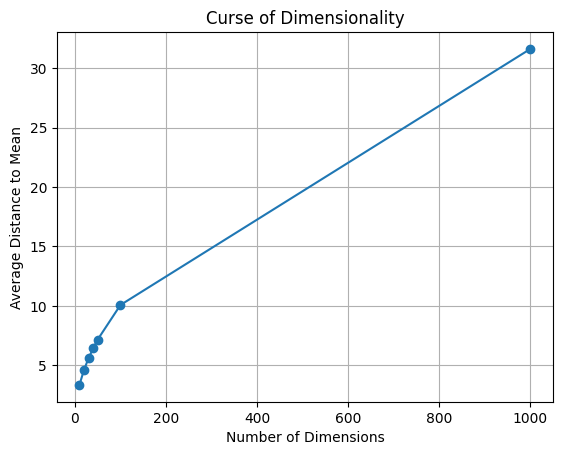

In [12]:
# The Curse of Dimensionality
# ----------------------------
# As the number of features (dimensions) increases in a dataset, the volume of the feature space grows exponentially.
# This can lead to challenges such as:
# - **Sparsity**: Data points are spread thinly across the space, making it harder to identify meaningful patterns.
# - **Computational inefficiency**: Algorithms may become slow or unfeasible due to the large search space.
# - **Overfitting**: Models may capture noise rather than meaningful patterns, reducing their generalizability.
# 
# Let's start by visualizing the curse of dimensionality:

import numpy as np
import matplotlib.pyplot as plt 
# Generates synthetic datasets for classification problems
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification  
# Generate datasets with increasing dimensions
# Each dataset has a specified number of dimensions, and we calculate the average distance of data points from the mean.

# make_classification:
# This function generates a synthetic dataset useful for classification tasks. It allows control over:
# - `n_samples`: The number of samples (rows) in the dataset.
# - `n_features`: Total number of features (columns) in the dataset. This includes both informative and non-informative features.
# - `n_informative`: The number of informative features, which contribute directly to the target labels. These features have predictive value.
# - **Difference**: `n_features` represents the total features in the dataset, including noise and redundant features. `n_informative` is a subset of these features that are directly useful for prediction.
# - `n_redundant`: Features that are linear combinations of the informative features and add no additional predictive value.
# - `n_classes`: The number of distinct classes in the dataset.
# - `random_state`: Ensures reproducibility by fixing the random seed.
dimensions = [10,20,30,40,50,100,1000]
data_sparsity = []

for d in dimensions:
    # Create synthetic data with 'd' dimensions
    X, _ = make_classification(n_samples=1000, n_features=d, n_informative=2, n_redundant=0, random_state=42)
    # Compute the average distance of points from the mean in this feature space
    sparsity = np.mean(np.linalg.norm(X - X.mean(axis=0), axis=1))
    data_sparsity.append(sparsity)

# Plot the effect of increasing dimensions on data sparsity
plt.plot(dimensions, data_sparsity, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance to Mean')
plt.title('Curse of Dimensionality')
plt.grid(True)
plt.show()

This fact implies that highdimensional
datasets are at risk of being very sparse: most training instances are
likely to be far away from each other. Of course, this also means that a new instance
will likely be far away from any training instance, making predictions much less reliable
than in lower dimensions, since they will be based on much larger extrapolations.
In short, the more dimensions the training set has, the greater the risk of overfitting
it. In theory, one solution to the curse of dimensionality could be to increase the size of
the training set to reach a sufficient density of training instances. Unfortunately, in
practice, the number of training instances required to reach a given density grows
exponentially with the number of dimensions.

### Projections

Projection is one of the most common techniques for dimensionality reduction. The idea is to map high-dimensional data into a lower-dimensional subspace, such as a plane or a line, in a way that preserves key properties of the data. This idea is based on the fact that in most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances actually lie within
(or close to) a much lower-dimensional subspace of the high-dimensional space.

#### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a foundational technique in the field of data analysis, statistics, and machine learning, employed to reduce the dimensionality of a dataset while preserving as much of its variability as possible. By identifying new orthogonal axes, or principal components, PCA transforms the data into a new coordinate system where the greatest variance lies along the first axis, the second greatest variance lies along the second axis, and so forth. This transformation serves to simplify the dataset, remove redundant features, and highlight latent structures in the data, making PCA a valuable tool in both exploratory data analysis and preprocessing for machine learning algorithms.

The primary motivation for PCA is rooted in the challenges posed by high-dimensional data. In many practical scenarios, datasets contain numerous correlated features, leading to redundancy and difficulties in interpretation. Additionally, as the dimensionality of the dataset increases, computational efficiency and model performance often deteriorate, a phenomenon known as the "curse of dimensionality." PCA addresses these challenges by projecting the data onto a lower-dimensional subspace, defined by the principal components, without a significant loss of information. The method relies on the mathematical framework of linear algebra and statistics, making it both theoretically elegant and computationally efficient.

To fully understand PCA, we must derive its mathematical foundation. Let us consider a dataset $\mathbf{X} \in \mathbb{R}^{n \times d}$, where $n$ is the number of observations and $d$ is the number of features. Each row of $\mathbf{X}$ represents a data point, and each column represents a feature. The goal of PCA is to find a set of orthogonal axes, known as principal components, onto which the data can be projected, such that the variance of the projected data along these axes is maximized.

#### PCA using SVD 

**Simple Dataset Generation**

- Trigonometric functions (cos and sin) produce periodic patterns for X[:, 0] and X[:, 1].
- Random angles ensure a spread of points along the trigonometric curve.
- X[:, 2] combines the first two dimensions with specific weights (w1 and w2) to simulate a dependent variable with added randomness.

In [13]:
#
# Explanation:
# - The dataset is generated in three dimensions.
# - The first two dimensions (X[:, 0] and X[:, 1]) are based on trigonometric functions of random angles.
# - The third dimension (X[:, 2]) is created as a weighted linear combination of the first two dimensions, with added noise.
# - Noise is introduced to make the dataset more realistic by simulating measurement errors or natural variations.
#
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(4)
# Number of data points to generate
m = 1000
# Coefficients for the linear combination in the Z dimension
w1, w2 = 0.1, 0.3
# Noise level to add random variation to the data
noise = 0.1
# Generate random angles uniformly distributed between -0.5 and (3π/2 - 0.5)
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
# Initialize an empty 3D array to store the dataset
X = np.empty((m, 3))
# Compute the X[:, 0] (first dimension) as a combination of sine and cosine functions of the angles
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
# Compute the X[:, 1] (second dimension) using a scaled sine function and adding noise
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
# Compute the X[:, 2] (third dimension) as a linear combination of the first two dimensions plus noise
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

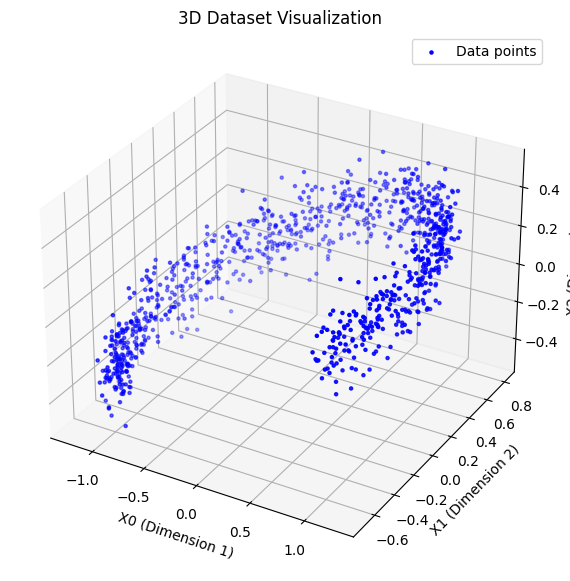

In [14]:
# Create a 3D scatter plot of the dataset
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with X[:, 0], X[:, 1], and X[:, 2]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='.', label='Data points')
# Add labels to the axes
ax.set_xlabel('X0 (Dimension 1)')
ax.set_ylabel('X1 (Dimension 2)')
ax.set_zlabel('X2 (Dimension 3)')
# Add a title and legend
ax.set_title('3D Dataset Visualization')
ax.legend()
# Show the plot
plt.show()

So how can you find the principal components of a training set? Luckily, there is a
standard matrix factorization technique called Singular Value Decomposition (SVD)
that can decompose the training set matrix X into the matrix multiplication of three
matrices 

$$
U \Sigma V^T 
$$
where $V$ contains all the principal components that we are looking for. The following Python code uses NumPy’s `svd()` function to obtain all the principal components of the training set, then extracts the first two PCs:

In [15]:
# Explanation:
# 1. The dataset is centered by subtracting its mean along each feature, making it zero-centered.
# 2. SVD is performed to decompose the centered data into three components:
#    - U contains the directions of the samples in the transformed space.
#    - s holds the singular values, indicating the importance of each principal component.
#    - Vt contains the principal directions (columns of Vt.T).
# 3. The first principal component (c1) is the direction along which the variance of the data is maximized.
# 4. The second principal component (c2) is orthogonal to the first and explains the second highest variance.

# The principal components c1 and c2 can now be used for further analysis, such as projecting the data onto these axes.

# Center the dataset by subtracting the mean of each feature (column)
# This ensures that the dataset has a mean of zero along each dimension
X_centered = X - X.mean(axis=0)

# Perform Singular Value Decomposition (SVD)
# np.linalg.svd decomposes a matrix as: X_centered = U * diag(s) * Vt
# - U: Matrix with left singular vectors (m x m, orthonormal)
# - s: Singular values (1D array of size min(m, n))
# - Vt: Transpose of the right singular vectors (n x n, orthonormal)
U, s, Vt = np.linalg.svd(X_centered)

# Extract the first principal component
# The first column of V (or Vt.T) corresponds to the direction of maximum variance
c1 = Vt.T[:, 0]

# Extract the second principal component
# The second column of V (or Vt.T) corresponds to the direction of the second highest variance
c2 = Vt.T[:, 1]

# Display the results
print("First Principal Component (c1):\n", c1)
print("Second Principal Component (c2):\n", c2)

First Principal Component (c1):
 [0.94490587 0.27289805 0.18077487]
Second Principal Component (c2):
 [-0.31404016  0.91156632  0.26537827]


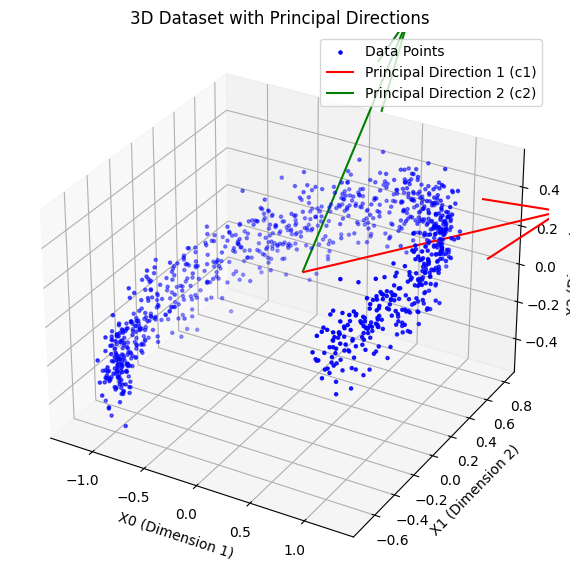

In [16]:
import matplotlib.pyplot as plt

# Calculate the mean of the dataset for centering
mean = X.mean(axis=0)

# Scale factors for the principal directions to make them visible
scale_factor = 2

# Calculate endpoints of the principal directions
# c1 and c2 are scaled and anchored at the mean
pc1_end = mean + scale_factor * c1
pc2_end = mean + scale_factor * c2

# Create a 3D scatter plot for the dataset
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the dataset points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='.', label='Data Points')

# Plot the first principal direction (c1) as a red arrow
ax.quiver(
    mean[0], mean[1], mean[2],  # Starting point (mean)
    c1[0] * scale_factor, c1[1] * scale_factor, c1[2] * scale_factor,  # Direction (scaled)
    color='r', label='Principal Direction 1 (c1)'
)

# Plot the second principal direction (c2) as a green arrow
ax.quiver(
    mean[0], mean[1], mean[2],  # Starting point (mean)
    c2[0] * scale_factor, c2[1] * scale_factor, c2[2] * scale_factor,  # Direction (scaled)
    color='g', label='Principal Direction 2 (c2)'
)

# Add axis labels
ax.set_xlabel('X0 (Dimension 1)')
ax.set_ylabel('X1 (Dimension 2)')
ax.set_zlabel('X2 (Dimension 3)')

# Add a title and legend
ax.set_title('3D Dataset with Principal Directions')
ax.legend()

# Show the plot
plt.show()

The following code constructs a diagonal matrix $S$ using the singular values $s$ obtained from Singular Value Decomposition (SVD).

In [17]:
# Explanation:
# 1. S is part of the SVD decomposition: X_centered = U * S * V^T.
# 2. It ensures S has the correct shape (m x n) for compatibility with U (m x m) and V^T (n x n).
# 3. This step is essential if you plan to reconstruct the original dataset or analyze the singular values.
#
# Get the dimensions of the original dataset
# m: number of data points (rows)
# n: number of features (columns)
m, n = X.shape

# Initialize an empty matrix S of the same shape as the centered dataset
# S will store the singular values in a diagonal matrix format
S = np.zeros(X_centered.shape)

# Populate the top-left n x n submatrix of S with the singular values
# - np.diag(s) creates a square diagonal matrix from the singular values s
# - S[:n, :n] ensures only the first n rows and columns are filled, matching the shape of V^T
S[:n, :n] = np.diag(s)

We can checks whether the matrix `X_centered`is approximately equal to the reconstructed matrix from its Singular Value Decomposition (SVD). 

   - **`np.allclose()`**:
     - A NumPy function that checks if two arrays are element-wise equal within a specified tolerance.
     - It returns `True` if all elements of the two arrays are approximately equal, and `False` otherwise.
     - Default tolerances are:
       - `atol`: Absolute tolerance (default is $1 \times 10^{-8} $).
       - `rtol`: Relative tolerance (default is $1 \times 10^{-5} $).
       
   - **`U.dot(S).dot(Vt)`**:
     - The reconstructed dataset using the SVD components:
       - $U$: Left singular vectors.
       - $S$: Diagonal matrix of singular values.
       - $V^T$: Transpose of the right singular vectors.
     - The matrix product $U \cdot S \cdot V^T$ should ideally reconstruct $X_{\text{centered}}$.

In [18]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

To project the training set onto the hyperplane, you can simply compute the matrix
multiplication of the training set matrix $X$ by the matrix $W_d$, defined as the matrix
containing the first $d$ principal components (i.e., the matrix composed of the first $d$
columns of $V$). The next snapshot of code reduces the dimensionality of the dataset from n-dimensions (original features) to 2D (first two principal components). The reduced dataset retains the maximum variance possible in the 2D subspace.

In [19]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D
print(X2D_using_svd)

[[-1.22406148 -0.53113997]
 [ 0.15884932  0.44624623]
 [-1.23082641 -0.45801283]
 ...
 [-1.28801245 -0.08442393]
 [ 1.11641326 -0.09614666]
 [ 0.7136855   0.33106703]]


#### PCA using Scikit-Learn

With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [21]:
X2D[:5]

array([[ 1.22406148,  0.53113997],
       [-0.15884932, -0.44624623],
       [ 1.23082641,  0.45801283],
       [ 0.82757991, -0.24037692],
       [ 0.81598401, -0.23558458]])

In [22]:
X2D_using_svd[:5]

array([[-1.22406148, -0.53113997],
       [ 0.15884932,  0.44624623],
       [-1.23082641, -0.45801283],
       [-0.82757991,  0.24037692],
       [-0.81598401,  0.23558458]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [23]:
np.allclose(X2D, -X2D_using_svd)

True

#### Explained Variance Ratio

Another very useful piece of information is the explained variance ratio of each principal
component, available via the explained_variance_ratio_ variable. It indicates
the proportion of the dataset’s variance that lies along the axis of each principal component.
For example, let’s look at the explained variance ratios of the first two components
of the 3D dataset

In [24]:
pca.explained_variance_ratio_

array([0.85341663, 0.1369031 ])

The first dimension explains 84.2% of the variance, while the second explains 14.6%. By projecting down to 2D, we lost about 1% of the variance:

In [25]:
1 - pca.explained_variance_ratio_.sum()

0.00968027240262126

#### A Simple Example of PCA on Interest Rate Data

PCA as a concept is useful for measuring risk arising from a set of correlated market variables. For example, interest rates that are quoted in the market have correlation to each other. Thus, an interest rate for tenor 1Y is not independent of interest rate for tenor say 3Y. There is always some degree of correlation between all the tenor points with each other. To achieve this objective, the PCA model computes a set of variables that are called as Principal components (PCs). PCA is a model which involves transforming a set of observations (i.e. interest rate time series in our case) into a set of uncorrelated variables called as the PCs. This transformation behaves in way such that the first PC explains the largest possible variance, and this accounts for majority of the variability in the data. Each succeeding component in turn explains the highest possible variance while at the same time following the condition of orthogonality to each of the preceding PCs. Resulting PCs computed by the model are uncorrelated to each other, thereby allowing them to be used independently with respect to each other. 

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

In [30]:
path = './data/'
data = pd.read_csv(path + 'MarketData.csv', sep=',')
x = pd.DataFrame(data)
x.head()

,Date,3m,6m,1y,2y,3y,4y,5y,7y,10y
0,1,7.71,7.90,8.16,8.56,8.71,8.75,8.94,9.04,8.76
1,2,7.75,7.93,8.17,8.58,8.72,8.76,8.96,9.05,8.76
2,3,7.68,7.90,8.18,8.54,8.69,8.75,8.92,9.02,8.73
3,4,7.69,7.93,8.22,8.55,8.70,8.76,8.93,9.03,8.75
4,5,7.69,7.96,8.22,8.55,8.70,8.76,8.93,9.03,8.75


In [31]:
df = x.drop(axis=1,columns=['Date'])
X = df.values

In [32]:
#Normalization of the data
X = scale(X)

Factor loadings can be calculated as below:

In [33]:
pca = PCA(n_components=9)
pca.fit(X)
factor_loading = pca.components_
df_factor_loading = pd.DataFrame(factor_loading)
df_factor_loading

,0,1,2,3,4,5,6,7,8
0,-0.326333,-0.332127,-0.335253,-0.336409,-0.336407,-0.336645,-0.336749,-0.331415,-0.328477
1,0.544483,0.481083,0.254532,0.026220,-0.094576,-0.232499,-0.195293,-0.439282,-0.335432
2,-0.420097,-0.089586,0.239718,0.367905,0.368985,0.193024,0.162056,-0.254609,-0.598480
3,-0.483507,0.155548,0.552238,0.194323,-0.150791,-0.285729,-0.310074,-0.106423,0.432952
4,-0.077813,0.031178,-0.068074,-0.189461,-0.066528,0.199704,0.509370,-0.714587,0.371542
5,0.265687,-0.373126,-0.286407,0.548879,0.267776,0.002223,-0.390429,-0.316872,0.286948
6,0.156875,-0.313745,0.089269,0.445102,-0.474288,-0.417560,0.506926,0.089134,-0.081522
7,-0.113533,0.227273,-0.269583,-0.058133,0.562689,-0.692176,0.238268,0.028055,0.078216
8,0.269520,-0.579435,0.541370,-0.417573,0.318277,-0.142704,0.020379,-0.035621,0.028572


Factor loadings explain the relation between the impact of a factor on interest rates at respective tenor points.
In PCA we also analyse the amount of dispersion explained by each of the PCs. Now we will see which PC contributes how much amount of variance/dispersion:

In [34]:
# variance percent of each PC
variance_percent_df = pd.DataFrame(data=pca.explained_variance_)
variance_ratio_df = pd.DataFrame(data=pca.explained_variance_ratio_)
variance_ratio_df = variance_ratio_df * 100
variance_ratio_df

,0
0,96.406078
1,1.931193
2,1.183464
3,0.242575
4,0.125015
5,0.059899
6,0.032387
7,0.013283
8,0.006106


From the table alongside, we observe that PC1 explains almost 96% of the total variation, and PC2 explains close to 1.95% of total variation. Therefore, rather than using all PCs in the subsequent calculation, we can only use PC1 and PC2 in further calculation as these two components explain close to 98% of the total variance. 

- PC1 corresponds to the roughly the parallel shift in the yield curve. 
- PC2 corresponds to roughly a steepening in the yield curve.

This is in-line with the theory of fixed income risk measurement which states that majority of the movement in the price of a bond is explained by the parallel shift in the yield curve and the residual movements in the price is explained by steepening and curvature of the interest rate curve.

### Linear Discriminant Analysis (LDA)

**Linear Discriminant Analysis (LDA)** is a supervised machine learning technique used for:

1. **Dimensionality Reduction**: Transforming data into a lower-dimensional space while preserving class separability.

2. **Classification**: Modeling the differences between classes.

It projects data onto a new axis (or axes) that maximize class separability based on the relationship between features and class labels.

**Key Objectives**

1. **Maximize Between-Class Variance**:
   - Ensure the means of different classes are as far apart as possible in the projected space.

2. **Minimize Within-Class Variance**:
   - Ensure the spread of data points within each class is as small as possible.

3. **Find the Optimal Projection**:
   - LDA identifies a linear combination of features (a projection) that best separates multiple classes.

**Steps in LDA**

1. **Compute the Mean of Each Class**:
   - For each class, compute the mean vector of the features.

<p></p>

2. **Compute the Within-Class Scatter Matrix ($ S_W $)**:
   - Measures the spread (variance) of data points within each class.
   
   $$
   S_W = \sum_{i=1}^k \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
   $$
   
   Where $ k $ is the number of classes, $ x $ is a data point, and $ \mu_i $ is the mean vector of class $ i $.

<p></p>

3. **Compute the Between-Class Scatter Matrix ($ S_B $)**:
   - Measures the spread of class means relative to the overall mean.

    $$
   S_B = \sum_{i=1}^k N_i (\mu_i - \mu)(\mu_i - \mu)^T
   $$
   
   Where $ N_i $ is the number of samples in class $ i $, and $ \mu $ is the overall mean vector.

<p></p>

4. **Solve the Generalized Eigenvalue Problem**:
   - Find the eigenvalues and eigenvectors of the matrix:
   
   $$
     S_W^{-1} S_B
     $$
   
   - The eigenvectors define the directions of the new axes (discriminant components), and the eigenvalues indicate their importance.

<p></p>

5. **Select the Top Discriminant Components**:
   - Choose the eigenvectors corresponding to the largest eigenvalues. For $ k $ classes, at most $ k-1 $ discriminant components can be used.

<p></p>

6. **Project the Data**:
   - Transform the data into the new space defined by the top discriminant components.

<p></p>

**Differences Between LDA and PCA**

| Aspect                  | LDA                             | PCA                             |
|-------------------------|----------------------------------|---------------------------------|
| **Type**                | Supervised                      | Unsupervised                   |
| **Goal**                | Maximize class separability     | Maximize variance              |
| **Components**          | Based on class relationships    | Based on overall data variance |
| **Application**         | Classification, Dimensionality Reduction | Dimensionality Reduction      |


**Applications**

1. **Dimensionality Reduction**:
   - Preprocessing step for high-dimensional data before applying a classifier.

2. **Classification**:
   - Used as a classifier itself or to improve the performance of other classification models.

3. **Feature Selection**:
   - Identifying the most discriminative features for separating classes.


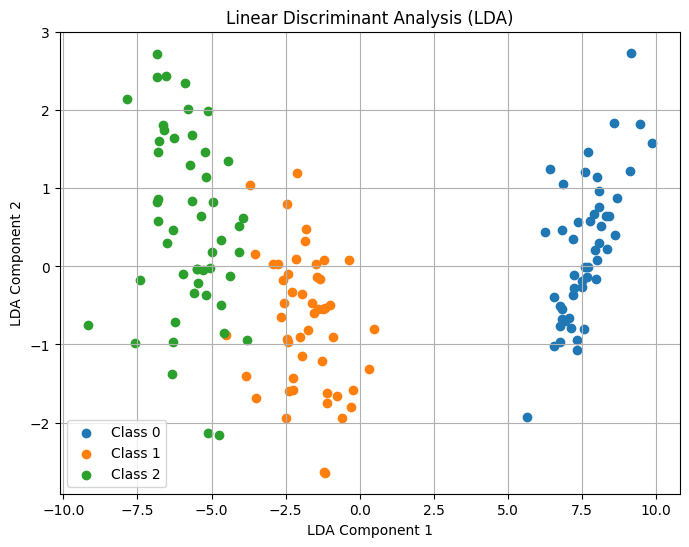

In [35]:
### **Example Workflow (in Python)**

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Class labels

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the projected data
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y)):
    plt.scatter(
        X_lda[y == label, 0],
        X_lda[y == label, 1],
        label=f'Class {label}'
    )
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Linear Discriminant Analysis (LDA)')
plt.legend()
plt.grid(True)
plt.show()

**Key Insights**

- LDA optimizes for class separability, making it particularly effective for classification problems.
- It is computationally efficient and works well for linearly separable data.
- LDA assumes:
  1. Classes have a Gaussian distribution.
  2. All classes share the same covariance matrix.
  3. Features are linearly related to the target.

## Appendix

### Mathematical Derivation of PCA

**1. Centering the Data**

The first step in PCA is to center the data by subtracting the mean of each feature from the corresponding feature values. Let $\mathbf{\mu} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$ denote the mean vector of the dataset, where $\mathbf{x}_i$ is the $i$-th row of $\mathbf{X}$. The centered dataset is given by:

$$
\mathbf{X}_c = \mathbf{X} - \mathbf{1}\mathbf{\mu}^\top,
$$

where $\mathbf{1} \in \mathbb{R}^{n \times 1}$ is a column vector of ones.

**2. Covariance Matrix**

The variability in the data is quantified by the covariance matrix, which captures the pairwise covariances between features. The covariance matrix of the centered dataset is defined as:

$$
\mathbf{\Sigma} = \frac{1}{n} \mathbf{X}_c^\top \mathbf{X}_c,
$$

where $\mathbf{\Sigma} \in \mathbb{R}^{d \times d}$. Each entry $\Sigma_{ij}$ represents the covariance between the $i$-th and $j$-th features.

**3. Principal Components as Eigenvectors**

The principal components are the directions in the feature space that maximize the variance of the data when projected onto them. Mathematically, this problem can be formulated as finding a vector $\mathbf{w} \in \mathbb{R}^d$ that maximizes the variance of the data projected onto $\mathbf{w}$. The variance of the projection is given by:

$$
\text{Var}(\mathbf{w}) = \mathbf{w}^\top \mathbf{\Sigma} \mathbf{w}.
$$

To ensure a unique solution, we impose the constraint that $\mathbf{w}$ is a unit vector, i.e., $\|\mathbf{w}\|_2 = 1$. This leads to the optimization problem:

$$
\max_{\|\mathbf{w}\|_2=1} \mathbf{w}^\top \mathbf{\Sigma} \mathbf{w}.
$$

This is a constrained optimization problem that can be solved using the method of Lagrange multipliers. The Lagrangian is given by:

$$
\mathcal{L}(\mathbf{w}, \lambda) = \mathbf{w}^\top \mathbf{\Sigma} \mathbf{w} - \lambda (\mathbf{w}^\top \mathbf{w} - 1),
$$

where $\lambda$ is the Lagrange multiplier. Taking the gradient with respect to $\mathbf{w}$ and setting it to zero yields:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 2\mathbf{\Sigma} \mathbf{w} - 2\lambda \mathbf{w} = 0.
$$

Simplifying, we obtain:

$$
\mathbf{\Sigma} \mathbf{w} = \lambda \mathbf{w}.
$$

This is the eigenvalue equation, where $\lambda$ is an eigenvalue of $\mathbf{\Sigma}$, and $\mathbf{w}$ is the corresponding eigenvector.

<img src="../05-pictures/lesson-2-2_pic_5.png" width=600 height=200 />

***Source: Géron A. "Hand on Machine Learning with Scikit-Learn Keras and Tensorflow"***

**4. Selecting Principal Components**

The eigenvectors of the covariance matrix $\mathbf{\Sigma}$ represent the principal directions of the data, while the eigenvalues indicate the amount of variance captured along each principal direction. By sorting the eigenvalues in descending order and selecting the top $k$ eigenvectors, we define the $k$-dimensional subspace that captures the most variance.

Let $\mathbf{W} \in \mathbb{R}^{d \times k}$ denote the matrix of the top $k$ eigenvectors. The reduced-dimensional representation of the data is given by:

$$
\mathbf{X}_{\text{reduced}} = \mathbf{X}_c \mathbf{W}.
$$

**Interpretation of the Results**

The principal components are orthogonal directions in the feature space that explain the maximum variance of the data. The first principal component explains the greatest variance, the second principal component explains the second greatest variance, and so on. By projecting the data onto these components, PCA reduces the dimensionality of the dataset while retaining the most significant patterns and structures.

**Applications of PCA**
PCA is widely used in various fields, including image compression, exploratory data analysis, and preprocessing for machine learning. Its ability to reduce noise, remove multicollinearity, and simplify datasets makes it a valuable tool in modern data science workflows.

## Appendix

A more realistic dataset for credit risk example

In [63]:
# Define rating categories and their default probabilities
rating_categories = {
    "AAA": {"default_prob": 0.01, "income_range": (100000, 200000), "loan_range": (50000, 300000)},
    "AA": {"default_prob": 0.02, "income_range": (90000, 180000), "loan_range": (40000, 250000)},
    "A": {"default_prob": 0.03, "income_range": (80000, 160000), "loan_range": (35000, 200000)},
    "BBB": {"default_prob": 0.05, "income_range": (60000, 140000), "loan_range": (30000, 150000)},
    "BB": {"default_prob": 0.10, "income_range": (40000, 120000), "loan_range": (20000, 100000)},
    "B": {"default_prob": 0.15, "income_range": (30000, 100000), "loan_range": (15000, 80000)},
    "CCC": {"default_prob": 0.25, "income_range": (25000, 80000), "loan_range": (10000, 60000)},
    "CC": {"default_prob": 0.35, "income_range": (20000, 70000), "loan_range": (8000, 40000)},
    "C": {"default_prob": 0.50, "income_range": (15000, 50000), "loan_range": (5000, 20000)},
    "D": {"default_prob": 0.80, "income_range": (10000, 30000), "loan_range": (2000, 10000)},
}

# Generate the dataset with improved consistency
num_samples = 10
ratings = list(rating_categories.keys())

df_consistent_credit_risk = pd.DataFrame()

# Generate data row by row ensuring consistency
for _ in range(num_samples):
    rating = np.random.choice(ratings)  # Select a credit rating
    rating_info = rating_categories[rating]

    income = np.random.randint(*rating_info["income_range"])  # Income based on rating
    loan_amount = np.random.randint(*rating_info["loan_range"])  # Loan based on rating
    age = np.random.randint(18, 75)  # Random age
    employment_status = np.random.choice(["Employed", "Unemployed", "Self-Employed"])

    # Default history based on rating's probability
    default_history = np.random.choice(["Yes", "No"], p=[rating_info["default_prob"], 1 - rating_info["default_prob"]])

    # Append row to DataFrame
    df_consistent_credit_risk = pd.concat([df_consistent_credit_risk, 
        pd.DataFrame([[rating, income, age, employment_status, loan_amount, default_history]], 
                     columns=["rating", "income", "age", "employment_status", "loan_amount", "default_history"])])

# Reset index
df_consistent_credit_risk.reset_index(drop=True, inplace=True)

df_consistent_credit_risk

,rating,income,age,employment_status,loan_amount,default_history
0,BB,89729,46,Unemployed,74326,No
1,AAA,196986,68,Employed,80082,No
2,CC,38722,38,Employed,38860,No
3,CCC,43563,39,Unemployed,10379,No
4,C,16028,28,Unemployed,18742,Yes
5,BB,66969,44,Unemployed,86941,No
6,A,115193,64,Unemployed,140246,No
7,C,18750,22,Unemployed,11251,No
8,CCC,69276,28,Employed,16086,No
9,A,135037,62,Self-Employed,184408,No


## References and Credits

**WEB**

**Abhyankar Ameya**, "*Exploring Risk Analytics using PCA with Python*", [Medium](https://abhyankar-ameya.medium.com/exploring-risk-analytics-using-pca-with-python-3aca369cbfe4), data files for the interest rate example and further details about the python code can be dowloaded from the github repository of the author [here](https://github.com/Ameya1983/TheAlchemist)